In [1]:
import numpy as np

In [2]:
import pandas as pd

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df=pd.DataFrame(housing.data)
df #there is no columns names assigned yet

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
#assigining columns name from housing
df.columns=housing.feature_names
df



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
#assigining independent and dependent variables
X = df.drop('HouseAge', axis=1)
y=df.HouseAge

In [5]:
#train test_split.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)


In [6]:
# standardizing the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

regression=LinearRegression()
regression.fit(X_train,y_train)
mse=cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
np.mean(mse)

-129.67766826588655

In [8]:
#prediction of value.
pred=regression.predict(X_test)

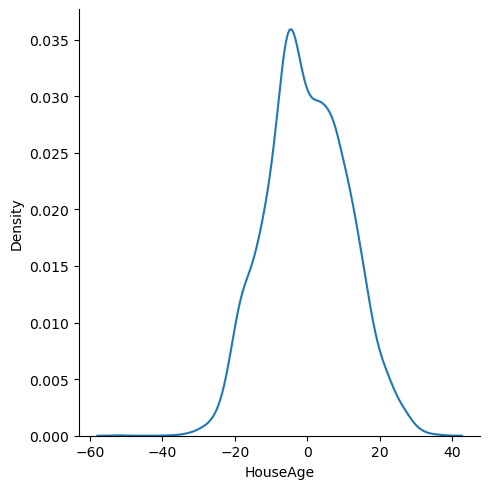

In [9]:
# validating with ploting
import seaborn as sns
sns.displot(pred-y_test,kind='kde')

In [10]:
# validating with r2_sore
from sklearn.metrics import r2_score
score=r2_score(y_test,pred)
score

0.20060689301380197

CV MSE (per fold): [135.55533594 132.73399456 116.9916764  139.79182433 129.18732869
 127.85693657 126.0529132  127.49512246 130.9102453  127.94949096]
Mean CV MSE: 129.4524868411203
Mean CV RMSE: 11.374870051732778


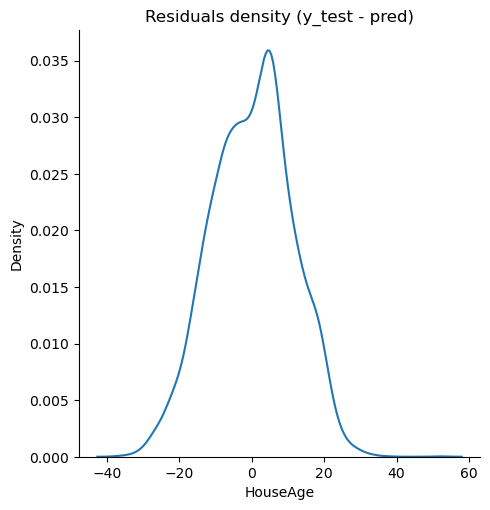

Test R2: 0.20060689301380197
Test RMSE: 11.192665575092997


In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Correct: drop target column (HouseAge) from features
X = df.drop('HouseAge', axis=1)   # <-- important fix
y = df['HouseAge']

# Split raw data (no scaling yet)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Use a pipeline so scaling happens inside each CV fold (no leakage)
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Cross-validation (neg MSE returned)
cv_neg_mse = cross_val_score(pipeline, X_train_raw, y_train, scoring="neg_mean_squared_error", cv=10)
cv_mse = -cv_neg_mse                    # positive MSE
cv_rmse = np.sqrt(cv_mse)

print("CV MSE (per fold):", cv_mse)
print("Mean CV MSE:", np.mean(cv_mse))
print("Mean CV RMSE:", np.mean(cv_rmse))

# Fit pipeline on full training data and evaluate on test set
pipeline.fit(X_train_raw, y_train)
pred = pipeline.predict(X_test_raw)

# Residuals plot (actual - predicted)
residuals = y_test - pred
sns.displot(residuals, kind='kde')
plt.title("Residuals density (y_test - pred)")
plt.show()

# R2 and RMSE on test
r2 = r2_score(y_test, pred)
rmse_test = np.sqrt(np.mean((y_test - pred)**2))
print("Test R2:", r2)
print("Test RMSE:", rmse_test)
